## Hand Tracking Basics
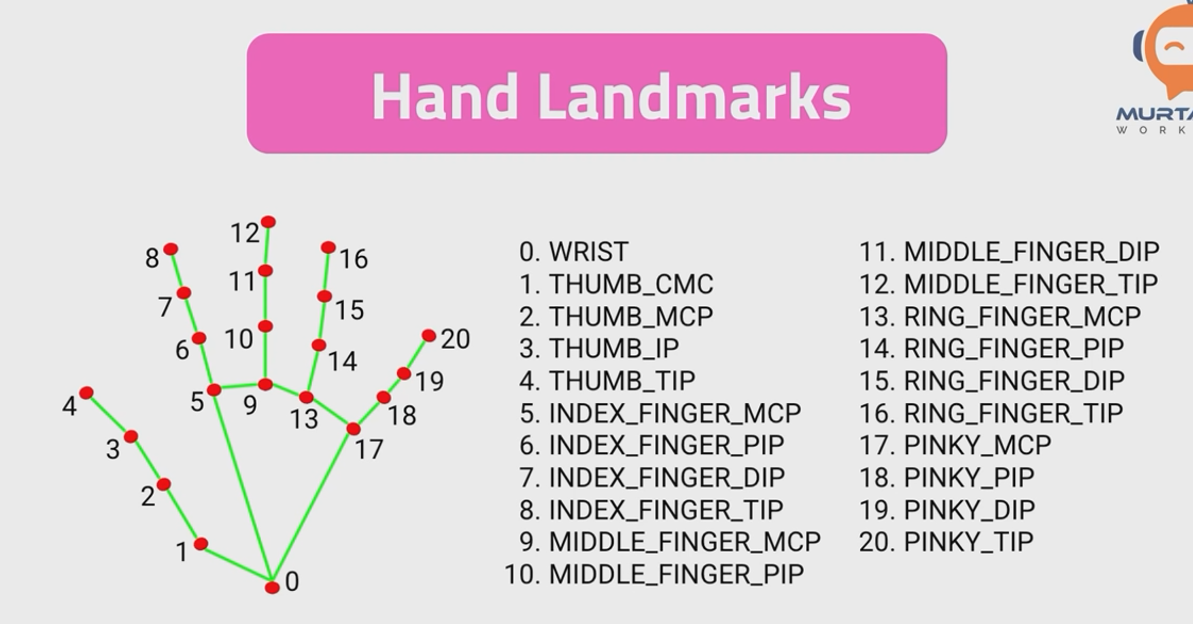

In [ ]:
# ! pip install mediapipe

In [2]:
import cv2 as cv
import mediapipe as mp
import time

In [ ]:
# Creating video object
cap = cv.VideoCapture(0)

mpHands= mp.solutions.hands
hands = mpHands.Hands()
mpDraw = mp.solutions.drawing_utils

pTime = 0
cTime = 0

while True:
    success , img = cap.read()
    imgRGB =  cv.cvtColor(img , cv.COLOR_BGR2RGB)
    results = hands.process(imgRGB)
    
    # Extracting Multiple hands
    print("Extracted Hand ",results.multi_hand_landmarks)
    if results.multi_hand_landmarks:
        for handLms in results.multi_hand_landmarks:
            # Checking hands index number
            for id , lm in enumerate(handLms.landmark):
                print("Landmark Id Number : ",id ," LandMark", lm)
                
                # Convert landmarks(lm) from decimal to Pixel values ny multiply with height and width
                h, w ,c = img.shape
                cx , cy = int(lm.x*w ) , int(lm.y * h)
                print("Coordinates of : ",id," Are : " , cx , cy)
                
                # Actions with a specipic landmark(part of the hand) and do something with it if needed
                if id == 0:
                    # Draw a big circle in landmark 0 in a purple color
                    cv.circle(img,(cx , cy) , 25 , (255,0,255) , cv.FILLED)
                
            
            
            # Show every single hand
            # Drawing the connections using mpHands (Optional) 
            mpDraw.draw_landmarks(img,handLms , mpHands.HAND_CONNECTIONS)
            
    # Showing the fbs rate (Frame by Second)
    cTime = time.time()
    fbs = 1 / (cTime - pTime)
    pTime = cTime
    cv.putText(img , str(int(fbs)), (10,70), cv.FONT_HERSHEY_PLAIN , 3 , (255,0,255),3)
    

    cv.imshow("Image" , img)
    cv.waitKey(1)

### Module

In [10]:
# Hand Traching Module
class handDetector():
    def __init__(self , mode = False , maxHands = 2 , detectionCon = 0.5 , trackCon = 0.5):
        self.mode = mode
        self.maxHands = maxHands
        self.detectionCon = detectionCon
        self.trackCon = trackCon
        
        self.mpHands= mp.solutions.hands
        self.hands = self.mpHands.Hands(self.mode , self.maxHands ,1, self.detectionCon , self.trackCon)
        self.mpDraw = mp.solutions.drawing_utils
        
    def findHands(self,img,draw = True):
        imgRGB =  cv.cvtColor(img , cv.COLOR_BGR2RGB)
        self.results = self.hands.process(imgRGB)
        if self.results.multi_hand_landmarks:
            for handLms in self.results.multi_hand_landmarks:
                if draw : self.mpDraw.draw_landmarks(img,handLms , self.mpHands.HAND_CONNECTIONS)
        return img
    
    def findPosition(self , img , handNo = 0 , draw = True):
        lmList = []
        if self.results.multi_hand_landmarks:
            
            myHand = self.results.multi_hand_landmarks[handNo]
            
            for id , lm in enumerate(myHand.landmark):
                    h, w ,c = img.shape
                    cx , cy = int(lm.x*w ) , int(lm.y * h)
                    lmList.append([id, cx, cy])
                    
                    if draw : cv.circle(img,(cx , cy) , 25 , (255,0,255) , cv.FILLED)
                    
        return lmList
        

In [9]:
pTime = 0
cTime = 0
cap = cv.VideoCapture(0)
detector = handDetector()

while True:
    success , img = cap.read()
    
    img = detector.findHands(img)
    lmList = detector.findPosition(img)
    if len(lmList) != 0 : print(lmList[4]) 
    
    cTime = time.time()
    fbs = 1 / (cTime - pTime)
    pTime = cTime
    
    cv.putText(img , str(int(fbs)), (10,70), cv.FONT_HERSHEY_PLAIN , 3 , (255,0,255),3)
    
    cv.imshow("Image" , img)
    cv.waitKey(1)

KeyboardInterrupt: 